#  <font color='purple'>Predict Churn For a Gym Chain<div>
By Yarden Miness, June 2022

### Introduction
Customer churn is one of the most critical challenges that gyms and other services confront. To combat churn, the gym chain Model Fitness is implementing a customer interaction strategy based on analytical data.

The purpose of this project is to help the gym chain Model Fitness make decisions on how to establish a customer interaction strategy based on analytical data. A portion of Model Fitness's customer profiles have been digitized. The goal is to assess customer characteristics and develop a customer retention plan to combat churn.

Project objectives and tasks:

- Evaluation of data
- For each customer, forecast the likelihood of churn (for the next month).
- Make a portrait of a typical user: choose the most notable groups and define their main characteristics
- Examine the elements that have the greatest impact on churn.
- Draw some broad generalizations and make suggestions about how to enhance customer service:
    - Determine your target demographics.
    - Suggestions for reducing churn
    - Describe any other tendencies you notice in terms of client engagement.


## Step 1. Data Preparation  

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as st
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
# Read CSV file
try:
    data = pd.read_csv("/datasets/gym_churn_us.csv")
    
except:
    data = pd.read_csv(r"C:\Users\owner\Desktop\praktikum_100\Sprint_10 project\gym_churn_us.csv")

In [3]:
data.columns = data.columns.str.lower() # Fix columns headings

In [4]:
data.sample(8)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
54,0,1,0,0,1,12,1,23,34.972072,11.0,3,0.029428,0.213189,0
2217,0,1,0,0,1,1,1,24,31.941974,1.0,3,1.620418,0.930484,1
1788,0,1,1,1,1,12,0,31,204.570451,12.0,9,1.118889,1.204222,0
3646,1,1,1,0,1,6,1,27,72.341249,6.0,0,0.282093,0.000000,1
350,1,1,1,0,1,1,1,32,202.841854,1.0,6,0.353748,0.187003,0
2821,0,1,1,0,1,6,0,33,271.114807,6.0,1,3.355149,3.415383,0
277,0,1,1,1,1,12,1,35,302.878535,9.0,4,4.661961,4.733059,0
1536,0,0,1,0,1,1,0,30,116.603654,1.0,12,1.645502,1.520773,0


In [5]:
data.shape

(4000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
data.duplicated().sum()

0

<font color='purple'>***Intermediate Conclusion***<font><div><font color='black'>
- CSV files including churn statistics.
- There are no missing values or duplicates .
- There are 14 columns and 4000 rows, all numerical columns are int64 or float64.

## Step 2. EDA

### Mean values and standard deviation 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


<font color='purple'>***Intermediate Conclusion***<font><div><font color='black'>  
Most important fcat we can see is taht **In the current month, 26.5 percent of customers had left the gym.**<div>	
    More details a portrait of a typical user can be concluded from the statistics are:
- Because the measurement are presented in a binary manner, we can deduce from the average that the gym's customers:
    - Almost equally divided men/women, with average age of 29 and most of them are local residents.
    - Almost every customer gave their contact information.
    - Most of the customers did not come through a "bring a friend" promotion and do not attend to group classes.<div>	
- On average a costumer spends about 147 USD on additional services.
- There are customers that have lifetime of 31 month, but the average lifetime of the costumers is almost four months.
- Most customers preferred a one-month contract when the average number of visits is roughly 1.9 times per week; some customers come every day, while others do not show up even once after signing the contract.

### Mean feature values and Distributions for those who left (churn) and for those who stayed

While all the above assists in our understanding of what distinguishes all clients in general, our ultimate goal is to identify the characteristics that affect churn. So, in this phase, I'll double-check each of the averages, but this time with a distinction between clients who have remained and those who have departed.

In [10]:
(round(data["churn"].value_counts()/data.shape[0],2)).to_frame("Churn Proportions")

,Churn Proportions
0,0.73
1,0.27


In [11]:
churn_groupby = data.groupby("churn").mean()
churn_groupby

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [12]:
churn_describe = data.groupby('churn').describe(include="all")

In [13]:
# We'll make scopes for binaty and other metrix.
bin_col = []
mul_col = []
for col in data.columns:
    if data[col].nunique() == 2:
        bin_col.append(col)
    else:
        mul_col.append(col)

 Gender:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.510037,0.499984,0.0,0.0,1.0,1.0,1.0
1,1061.0,0.510839,0.500118,0.0,0.0,1.0,1.0,1.0


,0,1
gender,1,0
churn rate,26.6%,26.5%


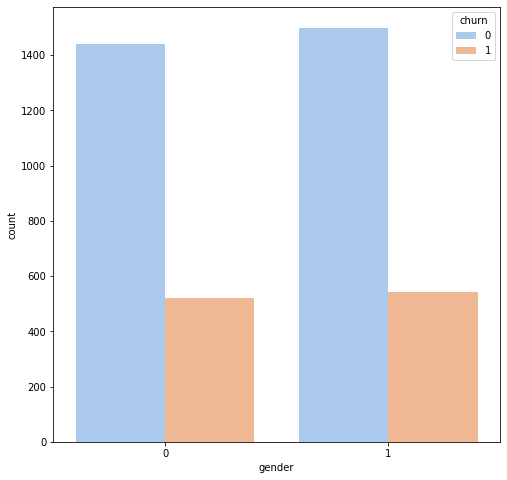

 Near_location:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.873086,0.332933,0.0,1.0,1.0,1.0,1.0
1,1061.0,0.768143,0.422217,0.0,1.0,1.0,1.0,1.0


,0,1
near_location,0,1
churn rate,39.7%,24.1%


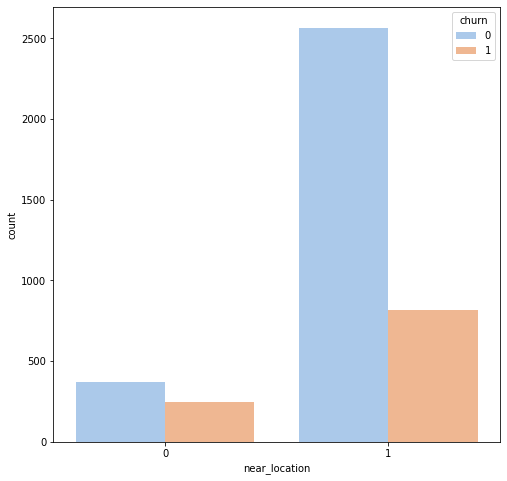

 Partner:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.534195,0.498914,0.0,0.0,1.0,1.0,1.0
1,1061.0,0.355325,0.478837,0.0,0.0,0.0,1.0,1.0


,0,1
partner,0,1
churn rate,33.3%,19.4%


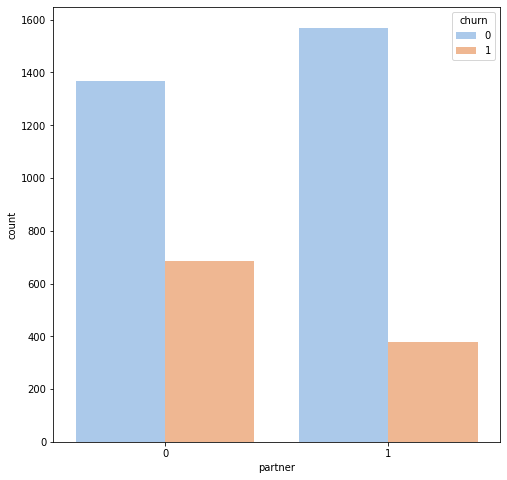

 Promo_friends:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.353522,0.478144,0.0,0.0,0.0,1.0,1.0
1,1061.0,0.183789,0.387495,0.0,0.0,0.0,0.0,1.0


,0,1
promo_friends,0,1
churn rate,31.3%,15.8%


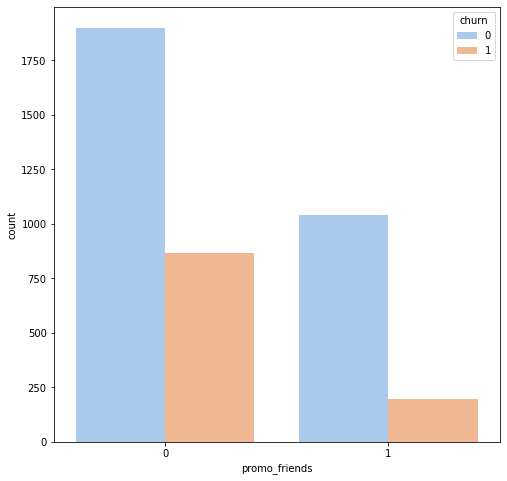

 Phone:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.903709,0.295040,0.0,1.0,1.0,1.0,1.0
1,1061.0,0.902922,0.296204,0.0,1.0,1.0,1.0,1.0


,0,1
phone,0,1
churn rate,26.7%,26.5%


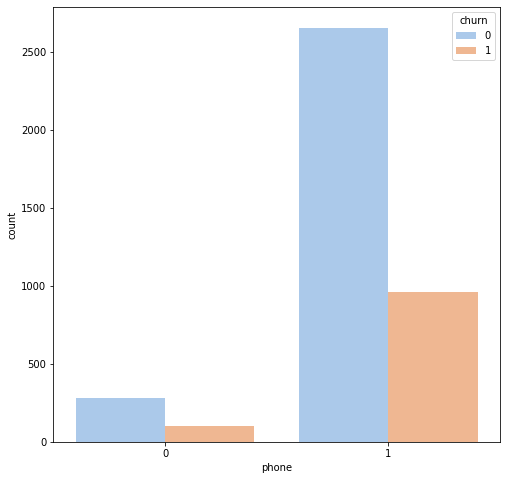

 Contract_period:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,5.747193,4.716942,1.0,1.0,6.0,12.0,12.0
1,1061.0,1.728558,2.132371,1.0,1.0,1.0,1.0,12.0


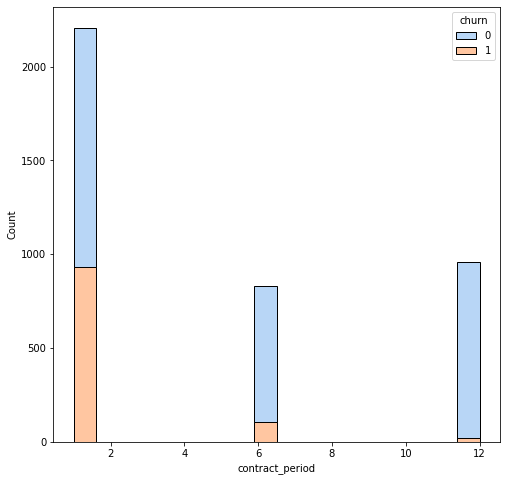

 Group_visits:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,0.464103,0.498795,0.0,0.0,0.0,1.0,1.0
1,1061.0,0.268615,0.443448,0.0,0.0,0.0,1.0,1.0


,0,1
group_visits,0,1
churn rate,33.0%,17.3%


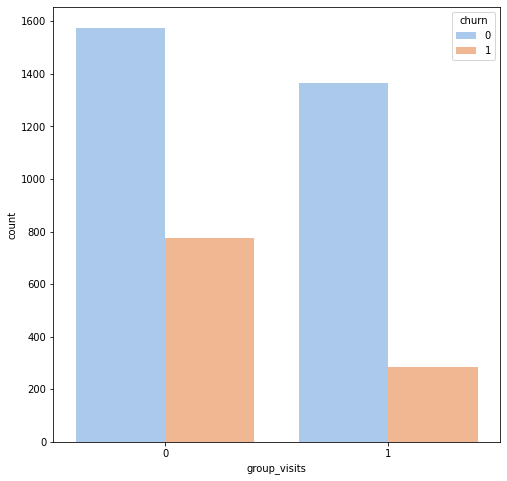

 Age:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,29.976523,3.009933,19.0,28.0,30.0,32.0,41.0
1,1061.0,26.989632,2.895163,18.0,25.0,27.0,29.0,38.0


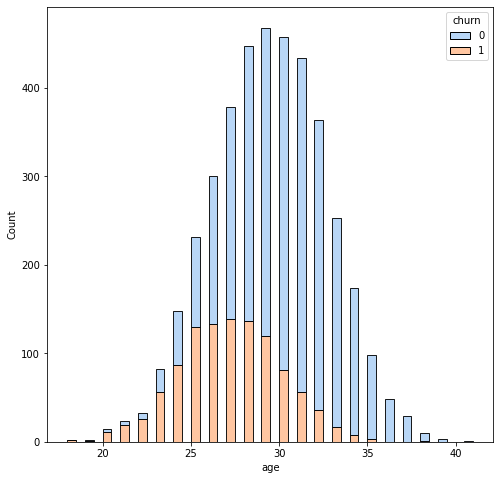

 Avg_additional_charges_total:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.59074
1,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.53522


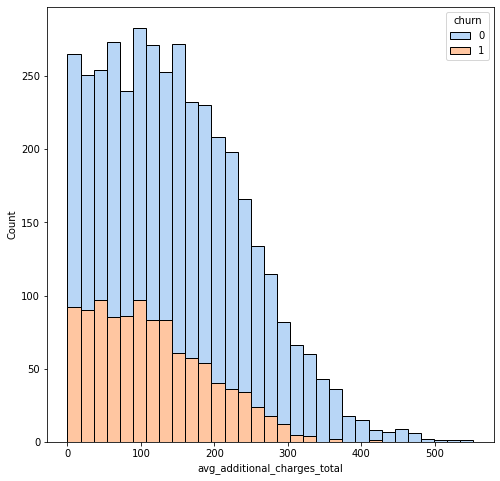

 Month_to_end_contract:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,5.283089,4.363522,1.0,1.0,6.0,10.0,12.0
1,1061.0,1.662582,1.964593,1.0,1.0,1.0,1.0,12.0


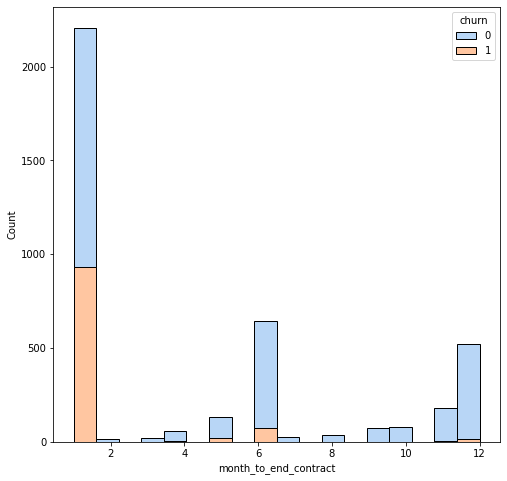

 Lifetime:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,4.711807,3.874780,0.0,2.0,4.0,6.0,31.0
1,1061.0,0.990575,1.110799,0.0,0.0,1.0,1.0,9.0


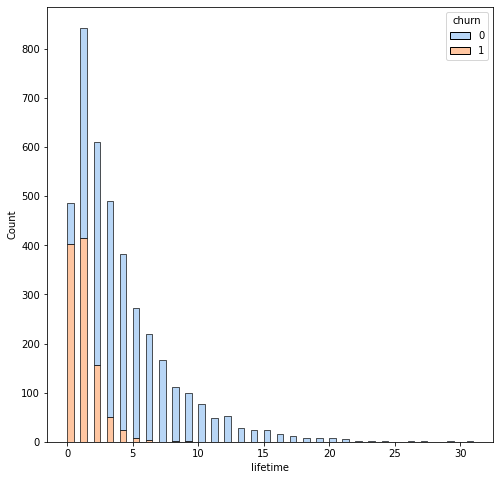

 Avg_class_frequency_total:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,2.024876,1.016006,0.0,1.283137,2.043252,2.732944,6.023668
1,1061.0,1.474995,0.694705,0.0,1.010771,1.491187,1.956438,3.478646


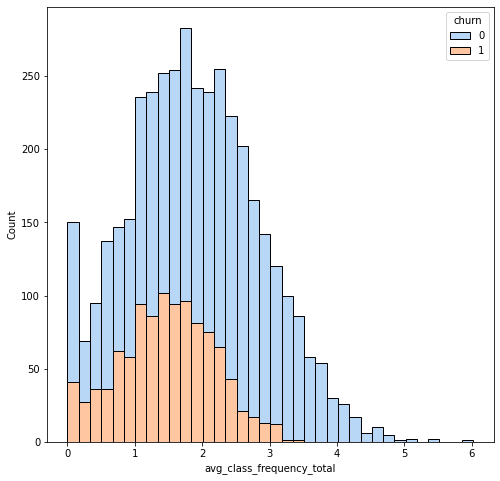

 Avg_class_frequency_current_month:


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,2.027882,1.018994,0.0,1.297021,2.046697,2.740648,6.146783
1,1061.0,1.044546,0.770237,0.0,0.421337,0.979445,1.588576,3.540271


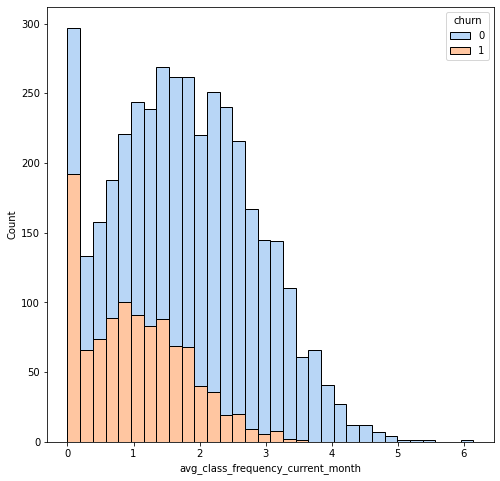

In [14]:
# Plot tables and graphs for churn/ no churn statistics.
for i in data.drop('churn',axis=1).columns.to_list():
    print('\033[1m {:}:\033[0m'.format(i.capitalize()))
    display(churn_describe[i])
    plt.figure(figsize=(8,8))
    if i in mul_col:
        sns.histplot(data=data, x=i, hue='churn',multiple="stack", palette='pastel')
    elif i in bin_col:
        display(data.groupby(i)['churn'].mean().sort_values(ascending=False).apply(lambda x: '{:.1%}'.format(x))
            .reset_index().rename(columns={'churn':'churn rate'}).T)
        sns.countplot(data=data, x=i, hue='churn', palette='pastel')
        plt.xticks((0,1))
    plt.show()

<font color='purple'>***Intermediate Conclusion***<font><div><font color='black'>  
**Portrait of a typical churned user:**<div>
- Can be equally men or women.
- The majority of consumers who have churned live nearby , however **39.7% of those who live far away have churned this month.**
- Customers that use the **"Partner" or "Bring a Friend" programs** are more loyal, as well as those takes part in **group sessions**.
- Customers who sign a **month-to-month contract** are more likely to leave the gym, but customers who sign a longer-term deal are more loyal.
- Average age of churned cutomers is 27.
- The more months a client has been registered to the gym throughout his lifetime, the less likely he is to leave.
- There is no clear difference in the average weekly frequency of visits, both in the current month and overall, between the consumers who leave and those who stay.

### Correlation matrix

We want to look at the level of correlation between the features, both to get a better understanding of the effects on churn and to ensure that there is no high correlation between the other features that could affect the model's quality, and thus my forecasts' quality.

To see if there are any **multicollinearity** features, we'll generate a corrleation matrix.

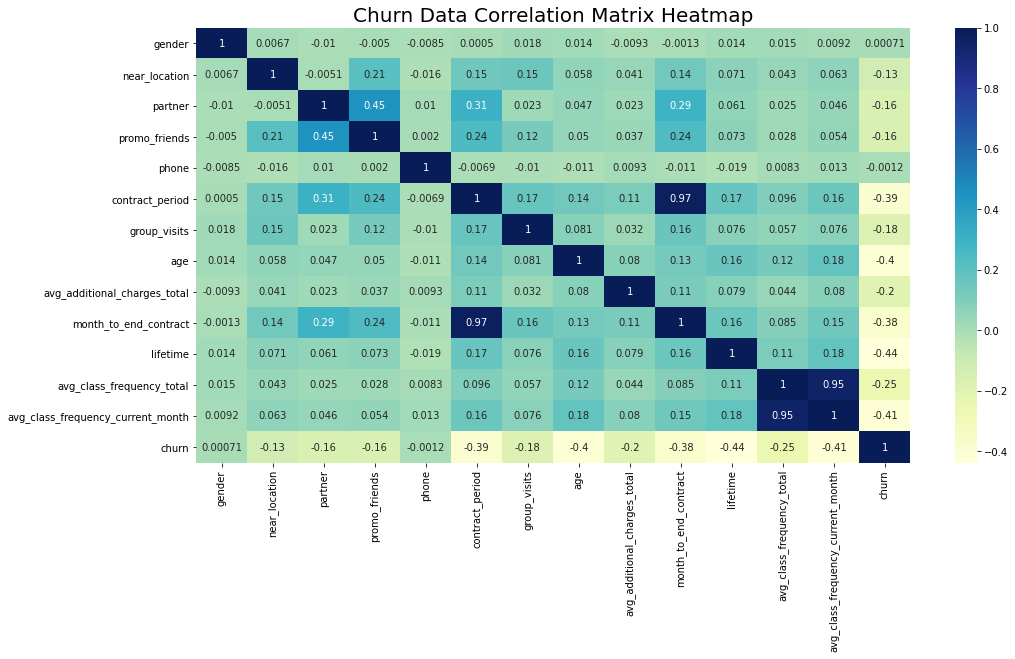

In [15]:
churn_corr= data.corr()
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(churn_corr, annot=True, cmap="YlGnBu").\
set_title('Churn Data Correlation Matrix Heatmap', fontsize=20)
plt.show()


If the correlation coefficient is more than 0.8, we may encounter issues with linear regression, such as unrepresentative weights and an overfitted model for these characteristics. **Training linear algorithms is difficult as a result of this**. Only those features with correlations below the threshold will be kept (0.8).
- "avg_class_frequency_total" to "avg_class_frequency_current_month", corr = 0.95
- "month_to_end_contract" to "contract_period", corr = 0.97
But before we drop characteristics let's examine "avg_class_frequency_total" and "avg_class_frequency_current_month" and "month_to_end_contract" to "contract_period" to see if those relationships have affect on churn.

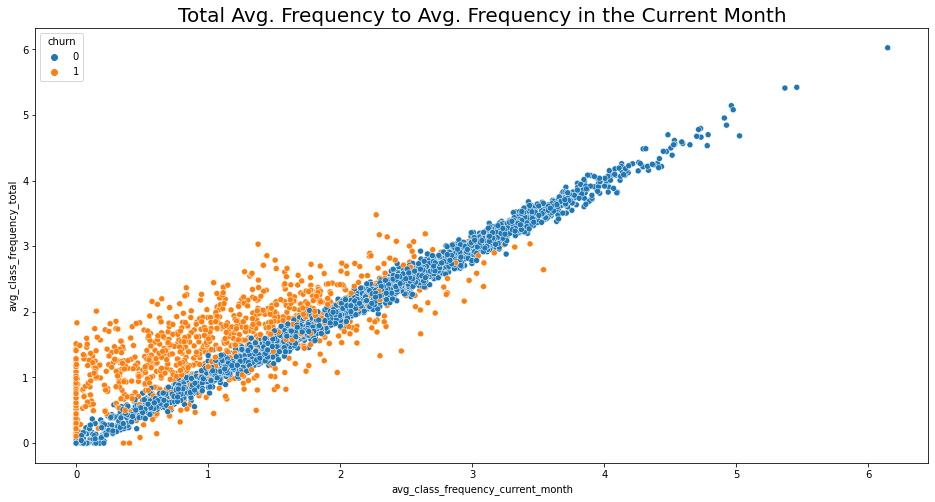

In [16]:
# Creating "avg_class_frequency_total" to "avg_class_frequency_current_month" scatterplot.
plt.figure(figsize=(16,8))
sns.scatterplot(x=data['avg_class_frequency_current_month'],y=data['avg_class_frequency_total'],hue=data['churn'])
plt.title('Total Avg. Frequency to Avg. Frequency in the Current Month',size=20)
plt.show()

We can see clearly that **customer that tend to churn will visit less days in the gym**. I will keep the **'avg_class_frequency_total'** column because I think all the data is important to prediction and remove **'avg_class_frequency_current_month'**.

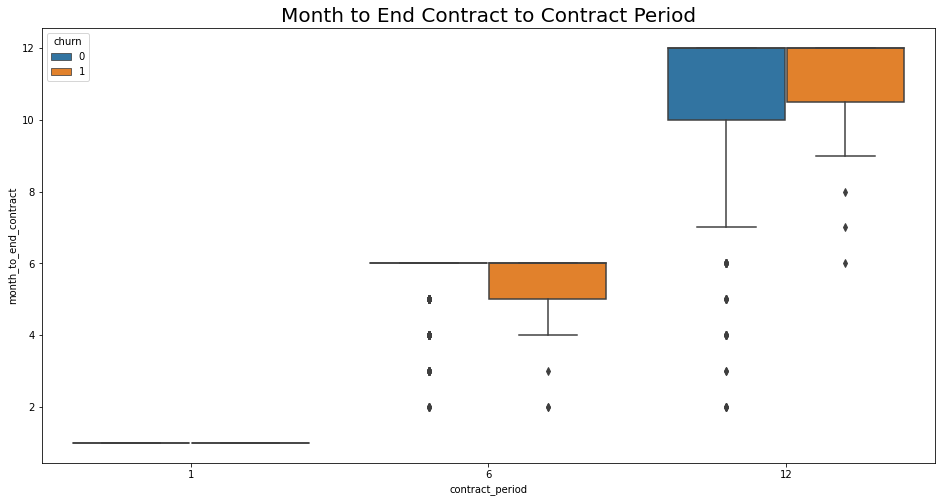

In [17]:
# Creating "avg_class_frequency_total" to "avg_class_frequency_current_month" Boxplot.
plt.figure(figsize=(16,8))
sns.boxplot(x=data['contract_period'],y=data['month_to_end_contract'],hue=data['churn'])
plt.title('Month to End Contract to Contract Period',size=20)
plt.show()

**The majority of consumers appear to leave in the beginning of the period** rather than at the end of the contract. However, because there are so many people who choose a one-month period, we can't avoid multicollinearity between the columns.
**Therefore, I choose to remove the feature 'month_to_end_contract' only.**

### Selecting final features

Along 'month_to_end_contract' and 'avg_class_frequency_current_month' I'm going to remove the columns 'gender' and 'phone' because I don't think they have anything to do with churn.

In [18]:
# Removing features
data.drop(['month_to_end_contract','avg_class_frequency_current_month','gender','phone'], axis = 1, inplace = True) 

In [19]:
data[:0]

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn


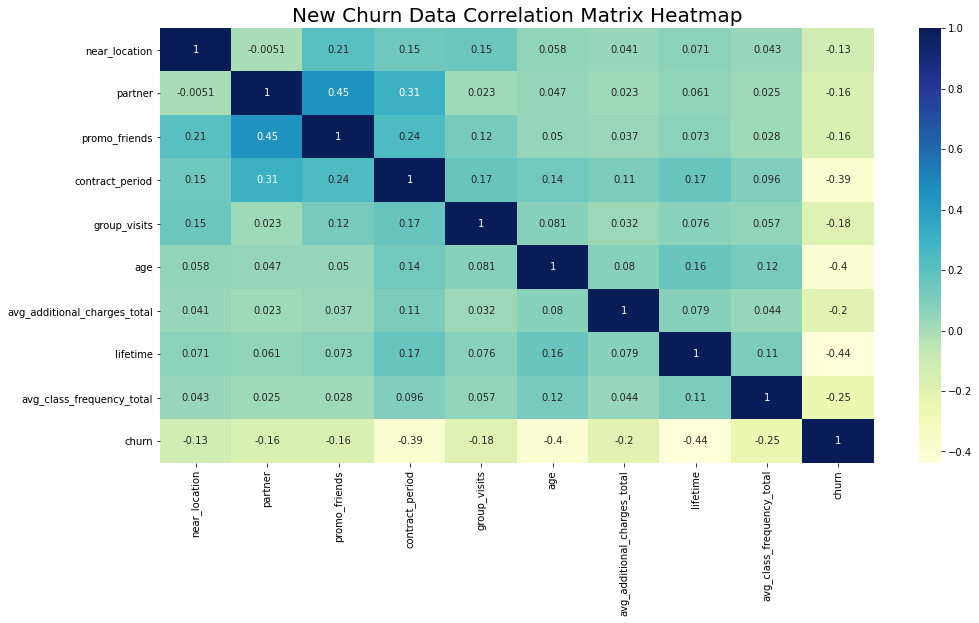

In [20]:
#Ploting new minimaized correlation matric.
churn_new_corr= data.corr()
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(churn_new_corr, annot=True, cmap="YlGnBu").\
set_title('New Churn Data Correlation Matrix Heatmap', fontsize=20)
plt.show()

## Step 3. Selecting Model for prediction of user churn

In [21]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [22]:
# Divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [23]:
# Divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# Create a StandardScaler object and apply it to the train set
scaler = StandardScaler()
scaler.fit(X_train)
# Transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Logistic regression model

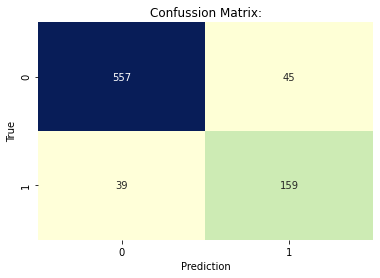

Metrics for Logistic Regression model:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.80
	F1: 0.79
	ROC_AUC: 0.95


In [25]:
# Define the model's algorithm
Logistic_model = LogisticRegression()
# Train model
Logistic_model.fit(X_train_st,y_train)
# We'll use the trained model to make forecasts
Logistic_predictions = Logistic_model.predict(X_test_st)
Logistic_probabilities = Logistic_model.predict_proba(X_test_st)[:,1] 
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Logistic_predictions)),annot=True, cmap="YlGnBu",fmt=',d', cbar=False)
plt.title('Confussion Matrix:')
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()
# print all metrics
print_all_metrics(y_test, Logistic_predictions, Logistic_probabilities , title='Metrics for Logistic Regression model:')


### Random forest model

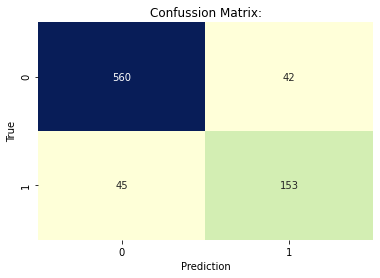

Metrics for random forest:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77
	F1: 0.78
	ROC_AUC: 0.94


In [26]:
# Define the algorithm for the random forest model
Random_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# Train model to make predictions
Random_model.fit(X_train_st, y_train)
Random_predictions = Random_model.predict(X_test_st)
Random_probabilities = Random_model.predict_proba(X_test_st)[:,1]
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Random_predictions)),annot=True, cmap="YlGnBu",fmt=',d', cbar=False)
plt.title('Confussion Matrix:')
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()
# print all metrics
print_all_metrics(y_test, Random_predictions, Random_probabilities, title = 'Metrics for random forest:')

<font color='purple'>***Intermediate Conclusion***<font><div><font color='black'>  
**The logistic regression algorithm is leading in all the metrics we will chose it for our prediction.**

## Step 4.User clusters - Agglomerative hierarchical clustering

The distance between the objects and the agglomerative hierarchical clustering itself can be visualized with special plots called dendrograms.


### Dendrogram

In [27]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(data.drop(columns ='churn'))

In [28]:
linked = linkage(x_sc, method = 'ward') 

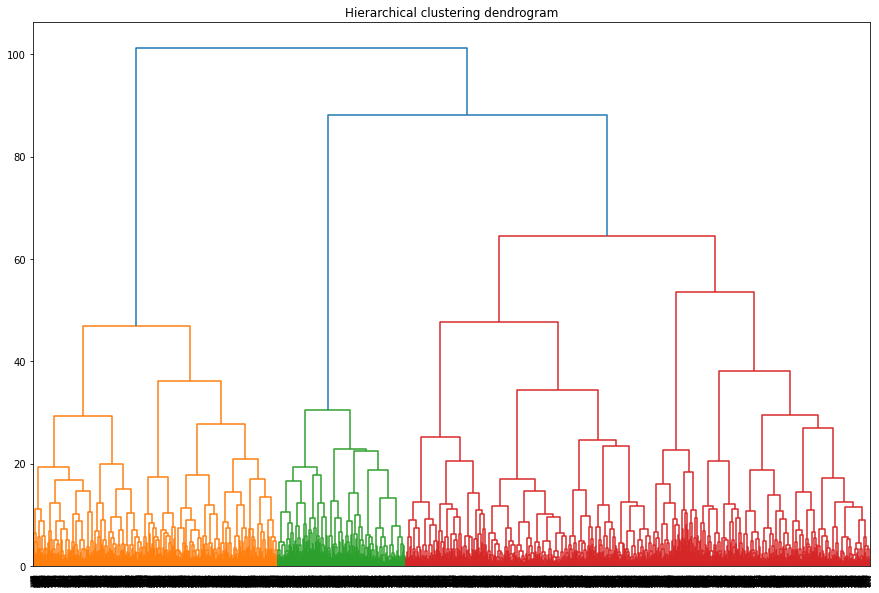

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Hierarchical clustering dendrogram')
plt.show()

The graph above illustrates that the gym's clientele may be classified into three clusters, resulting in four colors, but closer examination of the distances between the intersections reveals that the clusters are nearly squeezed together. As a result, when I check out the K-MEANS, I'll **set n=5 clusters**.

### K-means

In [30]:
# Define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# Predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)
# Store cluster labels into the field of our dataset
data['cluster'] = labels
# Print the statistics of the mean feature values per cluster
data.groupby(['cluster']).mean().T

cluster,0,1,2,3,4
near_location,1.000000,1.000000,0.984642,0.000000,0.996000
partner,0.209082,0.150466,0.622867,0.488449,0.952000
promo_friends,0.066225,0.095872,0.080205,0.074257,1.000000
contract_period,2.164617,3.173103,8.858362,2.942244,7.080000
group_visits,0.000000,1.000000,0.421502,0.227723,0.513000
age,28.422895,29.271638,30.412969,28.694719,29.500000
avg_additional_charges_total,135.457599,142.677066,174.991461,137.087062,151.825997
lifetime,2.456008,2.766977,7.815700,2.900990,3.887000
avg_class_frequency_total,1.700031,1.870907,2.237843,1.769985,1.930108
churn,0.455061,0.259654,0.006826,0.404290,0.136000


We can already see some differences in the clusters' means, but to get a complete picture, I'll present them as Histograms

<Near_location>:


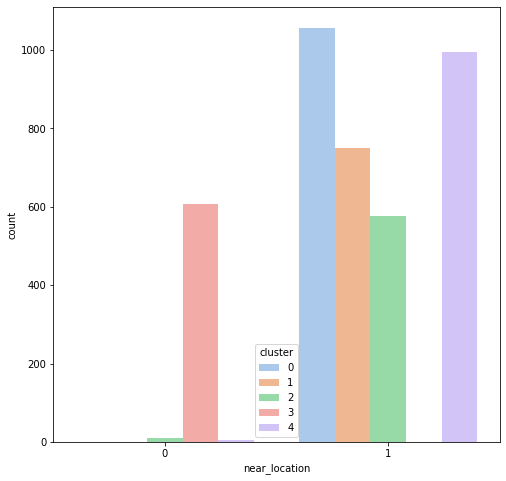

<Partner>:


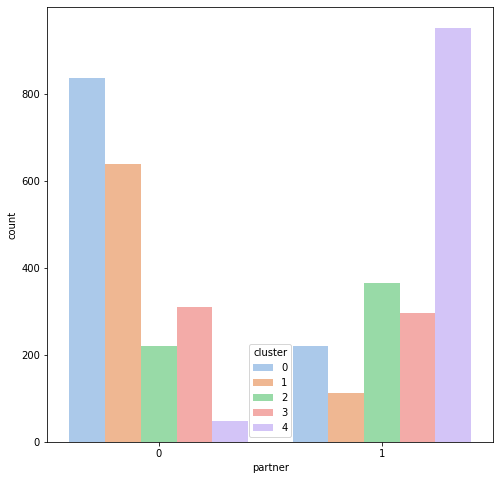

<Promo_friends>:


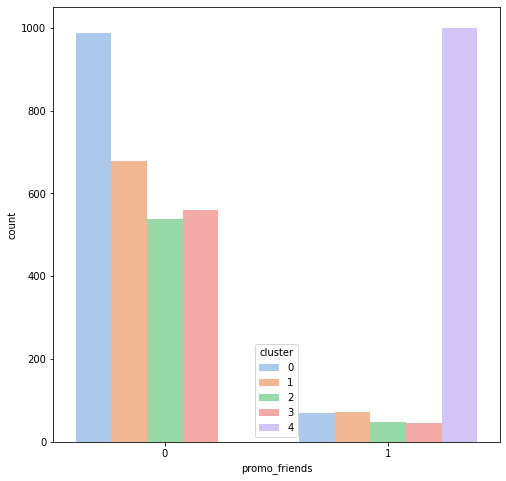

<Contract_period>:


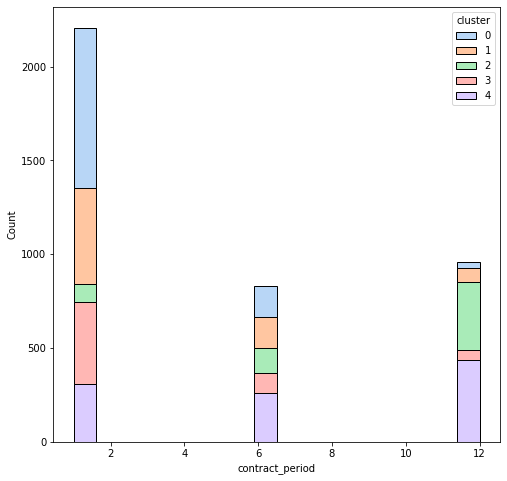

<Group_visits>:


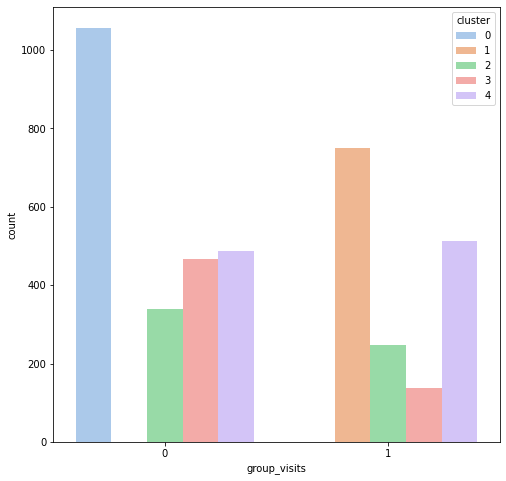

<Age>:


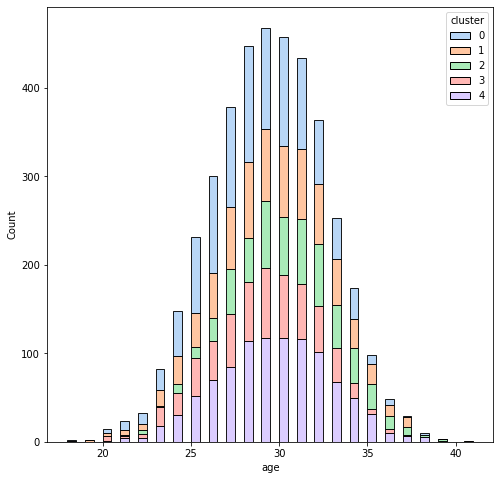

<Avg_additional_charges_total>:


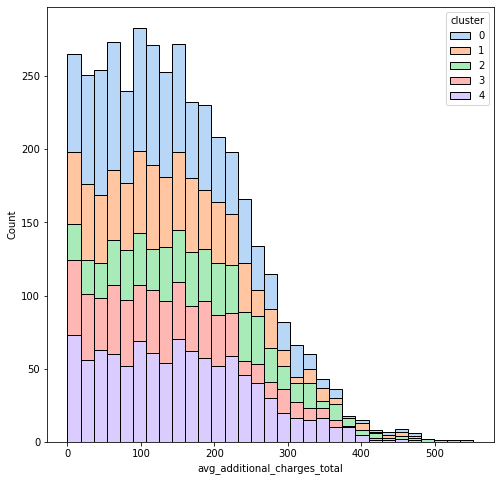

<Lifetime>:


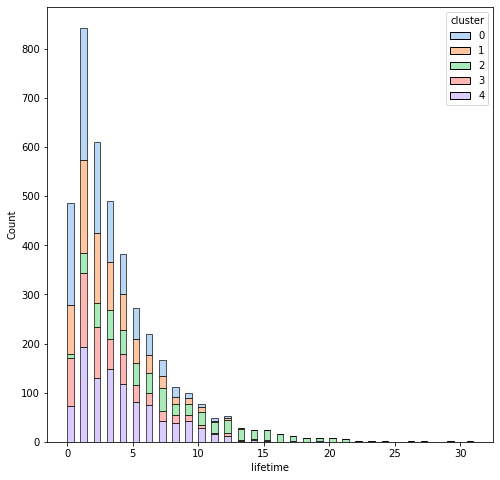

<Avg_class_frequency_total>:


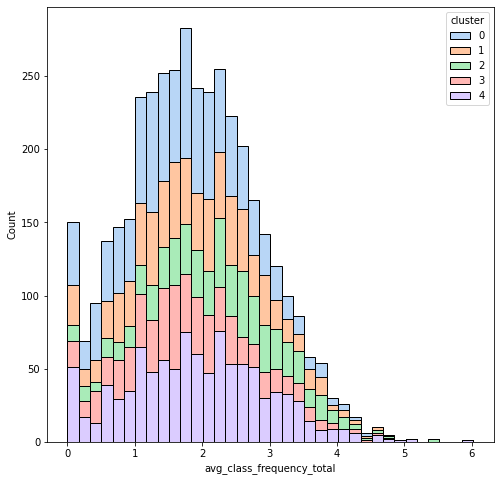

<Churn>:


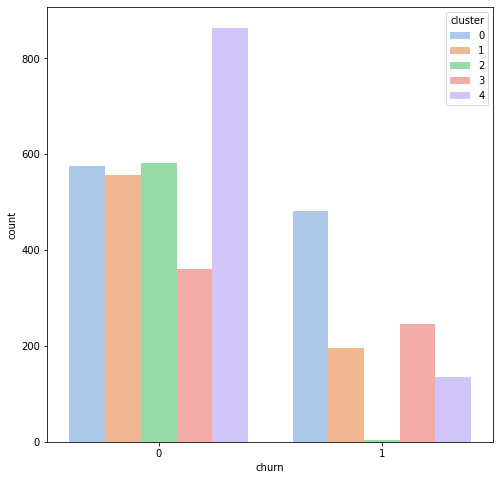

In [31]:
cluster_means = data.groupby('cluster').mean()
for i in data.drop('cluster',axis=1).columns.to_list():
    print('<{:}>:'.format(i.capitalize()))
    plt.figure(figsize=(8,8))
    if i in mul_col:
        sns.histplot(data=data, x=i, hue='cluster',multiple="stack", palette='pastel')
    if i in bin_col or i=='churn':
        sns.countplot(data=data, x=i, hue='cluster', palette='pastel')
        plt.xticks((0,1))
    plt.show()

 let's give our clustering a **silhouette score**:

In [32]:
print('Silhouette score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette score: 0.16


**We received a 0.16 score.** It's a long way from -1, which means it's not bad, but it's also a long way from 1 to be regarded good.

### Clusters profiling

- Cluster 0 - **"The Loyalist and Rich"** they wasted money on exta services, some of which have a 31-month lifetime!
- Cluster 1 - **"The Opportunists"** most of them came from 'Partner'and "bring a friend" whose get discounts.
- Cluster 2 - **"The Groupies"** they love group sessions, their liftime is smaller than a year and they pay a visit on average twice a week.
- Cluster 3 - **"The Sole Trainee"** they live nearby, and dont come from a program, have a contract of 1 month and love to train alone.
- Cluster 4 -**"The Cheap Aliens"** They live far away, are young, and do not waste money on extra services.

## <font color='purple'>Step 5. Conclusions and Recommendations<div>

## Final Conclusions

The most essential thing I discovered from an in-depth analysis of the data is that **churning customers will visit the gym on fewer days on average and they are fundamentally change the number of workouts in a week**. Furthermore, I discovered that a significant number of customers who dwell outside the neighborhood have left in the last month, but they are also included in the "The Cheap Aliens" cluster, implying that they are not a significant commercial factor.

We discovered a few more interesting stuff, like that a **majority of customers appear to quit at the beginning of the contract**, and that the majority of one-month contracts are deemed to be churned.

**The logistic regression algorithm:** is leading in all the metrics we will chose it for our prediction.

And finally,In terms of customer clustering, despite the fact that our clients are rather homogeneous, I was able to separate them into five clusters. And the group that hangs out the most at the gym is known as **"The Loyalist and Rich."** 

## Recommendations

Given the preceding conclusions, we might consider providing some sort of incentive for long-term contracts, as well as extra complimentary activities and a careful investigation of the first month of a client's experience, possibly through the use of satisfaction surveys. Clients from other clusters must be directed to "The Loyalist and Rice". They will if they get the impression that the gym is the ideal place to be fit and happy on a daily basis.